In [1]:
from qiskit.circuit.library import HiddenLinearFunction
import qiskit.tools.jupyter
A = [[1, 1, 0], [1, 0, 1], [0, 1, 1]]
circuit = HiddenLinearFunction(A)
%circuit_library_info circuit

In [2]:
from qiskit.circuit import QuantumCircuit, Parameter

circuit = QuantumCircuit(2)
params = [Parameter('A'), Parameter('B'), Parameter('C')]
circuit.ry(params[0], 0)
circuit.crx(params[1], 0, 1)

print('Original circuit:')
print(circuit.draw())

circuit.assign_parameters({params[0]: params[2]}, inplace=True)

print('Assigned in-place:')
print(circuit.draw())

Original circuit:
     ┌───────┐         
q_0: ┤ RY(A) ├────■────
     └───────┘┌───┴───┐
q_1: ─────────┤ RX(B) ├
              └───────┘
Assigned in-place:
     ┌───────┐         
q_0: ┤ RY(C) ├────■────
     └───────┘┌───┴───┐
q_1: ─────────┤ RX(B) ├
              └───────┘


In [3]:
from qiskit.circuit import QuantumCircuit, ParameterVector

circuit = QuantumCircuit(2)
params = ParameterVector('P', 2)
circuit.ry(params[0], 0)
circuit.crx(params[1], 0, 1)

bound_circuit = circuit.assign_parameters({params[0]: 1, params[1]: 2})
print('Bound circuit:')
print(bound_circuit.draw())

print('The original circuit is unchanged:')
print(circuit.draw())

Bound circuit:
     ┌───────┐         
q_0: ┤ RY(1) ├────■────
     └───────┘┌───┴───┐
q_1: ─────────┤ RX(2) ├
              └───────┘
The original circuit is unchanged:
     ┌──────────┐            
q_0: ┤ RY(P[0]) ├─────■──────
     └──────────┘┌────┴─────┐
q_1: ────────────┤ RX(P[1]) ├
                 └──────────┘


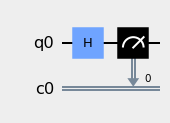

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

In [5]:
import numpy as np
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)
circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 0)
circuit.draw()

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711,-0.70711) ├
     └──────────────────────────────┘

In [6]:
import numpy as np
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.initialize('01', circuit.qubits)
circuit.draw()

┌──────────────────┐
q_0: ┤0                 ├
     │  initialize(0,1) │
q_1: ┤1                 ├
     └──────────────────┘

In [7]:
from qiskit import QuantumCircuit
top = QuantumCircuit(1)
top.x(0);
bottom = QuantumCircuit(2)
bottom.cry(0.2, 0, 1);
tensored = bottom.tensor(top)
print(tensored.draw())

        ┌───┐   
q_0: ───┤ X ├───
        └───┘   
q_1: ─────■─────
     ┌────┴────┐
q_2: ┤ RY(0.2) ├
     └─────────┘
